#Titulo

In [ ]:
import sys
!{sys.executable} -m pip install geojson
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scorecardpy
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install joblib

     |████████████████████████████████| 55 kB 2.9 MB/s eta 0:00:011
     |████████████████████████████████| 24.9 MB 10.1 MB/s eta 0:00:01    |█▎                              | 1.0 MB 10.1 MB/s eta 0:00:03
     |████████████████████████████████| 28.4 MB 18.2 MB/s eta 0:00:01   |                                | 20 kB 18.0 MB/s eta 0:00:02
     |████████████████████████████████| 303 kB 24.3 MB/s eta 0:00:01
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.2-py3-none-any.whl size=57827 sha256=ad3272ea99f791f80a85e8cdab002fab4ff015f61af433f1cf113eccbedd8348
  Stored in directory: /home/jovyan/.cache/pip/wheels/18/b9/40/9fc7fa3ee628a20fb571991f96d54997cfbfab13e752bacd84
Successfully built scorecardpy
     |████████████████████████████████| 9.4 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 48.7 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 5.3 MB/s eta 0:00:01


In [ ]:
import geojson
import pandas as pd
import geopandas
import folium
from geopy import distance
import matplotlib
import collections
import seaborn as sns
import numpy as np

In [ ]:
data_zonas=pd.read_csv("data_zonas.csv")

In [ ]:
data_zonas["Total"]=data_zonas[["ene.-21","feb.-21","mar.-21","abr.-21","may.-21","jun.-21"]].sum(axis=1)
data_zonas["Total_month"]=data_zonas["Total"]/6
data_zonas.head()

,Unnamed: 0,ID,ZONAS VIBRA,ene.-21,feb.-21,mar.-21,abr.-21,may.-21,jun.-21,Latitud,...,dist_zona143.1,dist_zona144.1,dist_zona145.1,dist_zona146.1,dist_zona147.1,dist_zona148.1,dist_zona149.1,dist_zona150.1,Total,Total_month
0,0,1.0,SKATE PARK,67550.0,135000.0,191250.0,247500.0,272250.0,274725.0,4.446568,...,457593.260412,594582.400252,291641.148249,294708.419447,103900.286279,59585.658746,555862.798293,401366.432534,1188275.0,198045.833333
1,1,2.0,PARQUE ANDRES LOPEZ DE GALARZA,78800.0,157500.0,225000.0,292500.0,321750.0,324675.0,4.439364,...,244216.422002,351495.940579,179676.252298,181717.161682,44652.405296,18793.003063,315426.323977,233024.128214,1400225.0,233370.833333
2,2,3.0,ZONA VIBRA BALTAZAR,66050.0,132000.0,178500.0,225000.0,247500.0,249750.0,4.443130,...,215417.255950,279832.081793,132541.234442,134680.605136,52878.887784,29426.041304,269318.023223,196446.264873,1098800.0,183133.333333
3,3,4.0,PARQUE DE LA MUSICA,71050.0,142000.0,197000.0,252000.0,277200.0,279720.0,4.443259,...,350654.473672,461769.283414,221224.494808,224615.326011,83188.426279,44948.686878,440082.911034,321437.520160,1218970.0,203161.666667
4,4,5.0,PLAZA DE LA 14,90050.0,180000.0,236250.0,292500.0,380250.0,324675.0,4.440362,...,516010.983235,715980.703527,354945.926548,359796.893314,108014.286553,50588.856684,661633.459620,487042.378031,1503725.0,250620.833333


In [ ]:
data_zonas["ratio_total_habitantes"]=data_zonas['Total_month']/data_zonas['TP27_PERSO']

In [ ]:
data_zonas["ratio_total_habitantes"].replace([np.inf,-np.inf],np.nan,inplace = True)
data_zonas=data_zonas[data_zonas["ratio_total_habitantes"].notnull()]

In [ ]:
print("mediana ratio : ",data_zonas[data_zonas["ratio_total_habitantes"].notnull()]["ratio_total_habitantes"].median())
print("\n")
print("Promedio ratio : ",data_zonas[data_zonas["ratio_total_habitantes"].notnull()]["ratio_total_habitantes"].mean())
print("\n")
print("Moda ratio : ",data_zonas[data_zonas["ratio_total_habitantes"].notnull()]["ratio_total_habitantes"].describe())

mediana ratio :  71.8261815920398


Promedio ratio :  415.2100864876082


Moda ratio :  count     115.000000
mean      415.210086
std       968.231005
min        22.576012
25%        47.962849
50%        71.826182
75%       127.922859
max      6777.239583
Name: ratio_total_habitantes, dtype: float64


<AxesSubplot:xlabel='ratio_total_habitantes'>

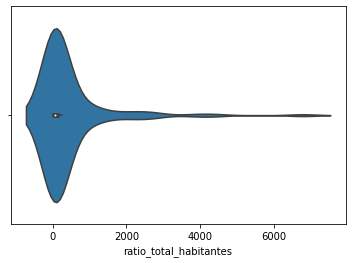

In [ ]:
sns.violinplot(x="ratio_total_habitantes", data=data_zonas)

**SE DEJARAn LAS VARIABLES QUE QUEREMOS EN EL MODELO**

In [ ]:
data_zonas=data_zonas[['ZONAS VIBRA','DENSIDAD','TP4_1_SI','TP4_2_NO','TP9_1_USO','TP9_2_USO','TP9_3_USO','TP9_4_USO','TP9_2_1_MI','TP9_2_2_MI','TP9_2_3_MI','TP9_2_4_MI','TP9_2_9_MI','TP9_3_1_NO','TP9_3_2_NO','TP9_3_3_NO','TP9_3_4_NO','TP9_3_5_NO','TP9_3_6_NO','TP9_3_7_NO','TP9_3_8_NO','TP9_3_9_NO','TP9_3_10_N','TP9_3_99_N','TVIVIENDA','TP14_1_TIP','TP14_2_TIP','TP14_3_TIP','TP14_4_TIP','TP14_5_TIP','TP14_6_TIP','TP15_1_OCU','TP15_2_OCU','TP15_3_OCU','TP15_4_OCU','TP16_HOG','TP19_EE_1','TP19_EE_2','TP19_EE_E1','TP19_EE_E2','TP19_EE_E3','TP19_EE_E4','TP19_EE_E5','TP19_EE_E6','TP19_EE_E9','TP19_ACU_1','TP19_ACU_2','TP19_ALC_1','TP19_ALC_2','TP19_GAS_1','TP19_GAS_2','TP19_GAS_9','TP19_RECB1','TP19_RECB2','TP19_INTE1','TP19_INTE2','TP19_INTE9','PERSONAS_L','PERSONAS_S','TP32_1_SEX','TP32_2_SEX','TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA','TP51PRIMAR','TP51SECUND','TP51SUPERI','TP51POSTGR','TP51_13_ED','TP51_99_ED','ratio_total_habitantes','TP27_PERSO']]

In [ ]:
##SEXO
data_zonas['pct_hombres']=data_zonas['TP32_1_SEX']/data_zonas[['TP32_1_SEX','TP32_2_SEX']].sum(axis=1)
data_zonas['pct_mujeres']=data_zonas['TP32_2_SEX']/data_zonas[['TP32_1_SEX','TP32_2_SEX']].sum(axis=1)



data_zonas['pct_0_9']=data_zonas['TP34_1_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_10_19']=data_zonas['TP34_2_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_20_29']=data_zonas['TP34_3_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_30_39']=data_zonas['TP34_4_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_40_49']=data_zonas['TP34_5_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_50_59']=data_zonas['TP34_6_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_60_69']=data_zonas['TP34_7_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_70_79']=data_zonas['TP34_8_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)
data_zonas['pct_80+']=data_zonas['TP34_9_EDA']/data_zonas[['TP34_1_EDA','TP34_2_EDA','TP34_3_EDA','TP34_4_EDA','TP34_5_EDA','TP34_6_EDA','TP34_7_EDA','TP34_8_EDA','TP34_9_EDA']].sum(axis=1)

data_zonas['pct_primaria']=data_zonas['TP51PRIMAR']/data_zonas['TP27_PERSO']
data_zonas['pct_secundaria']=data_zonas['TP51SECUND']/data_zonas['TP27_PERSO']
data_zonas['pct_superior']=data_zonas['TP51SUPERI']/data_zonas['TP27_PERSO']
data_zonas['pct_postgrado']=data_zonas['TP51POSTGR']/data_zonas['TP27_PERSO']
data_zonas['pct_ninguno_sininf']=data_zonas[['TP51_13_ED','TP51_99_ED']].sum(axis=1)/data_zonas['TP27_PERSO']

data_zonas['pct_internet']=data_zonas['TP19_INTE1']/data_zonas['TVIVIENDA']
data_zonas['pct_sin_internet']=data_zonas[['TP19_INTE2','TP19_INTE9']].sum(axis=1)/data_zonas['TVIVIENDA']

data_zonas['pct_basuras']=data_zonas['TP19_RECB1']/data_zonas['TVIVIENDA']
data_zonas['pct_sin_basuras']=data_zonas['TP19_RECB2']/data_zonas['TVIVIENDA']

data_zonas['pct_gas']=data_zonas['TP19_GAS_1']/data_zonas['TVIVIENDA']
data_zonas['pct_sin_gas']=data_zonas[['TP19_GAS_2','TP19_GAS_9']].sum(axis=1)/data_zonas['TVIVIENDA']


data_zonas['pct_estrato1']=data_zonas['TP19_EE_E1']/data_zonas['TVIVIENDA']
data_zonas['pct_estrato2']=data_zonas['TP19_EE_E2']/data_zonas['TVIVIENDA']
data_zonas['pct_estrato3']=data_zonas['TP19_EE_E3']/data_zonas['TVIVIENDA']
data_zonas['pct_estrato4']=data_zonas['TP19_EE_E4']/data_zonas['TVIVIENDA']
data_zonas['pct_estrato5']=data_zonas['TP19_EE_E5']/data_zonas['TVIVIENDA']
data_zonas['pct_estrato6']=data_zonas['TP19_EE_E6']/data_zonas['TVIVIENDA']
data_zonas['pct_estrato9']=data_zonas['TP19_EE_E9']/data_zonas['TVIVIENDA']

data_zonas['hogares_vivienda']=data_zonas['TP16_HOG']/data_zonas['TVIVIENDA']

data_zonas['pct_vivi_ocu']=data_zonas['TP15_1_OCU']/data_zonas['TVIVIENDA']
data_zonas['pct_vivi_ause']=data_zonas['TP15_2_OCU']/data_zonas['TVIVIENDA']
data_zonas['pct_vivi_temp']=data_zonas['TP15_3_OCU']/data_zonas['TVIVIENDA']
data_zonas['pct_vivi_desocu']=data_zonas['TP15_4_OCU']/data_zonas['TVIVIENDA']

data_zonas['pct_casa']=data_zonas['TP14_1_TIP']/data_zonas['TVIVIENDA']
data_zonas['pct_apto']=data_zonas['TP14_2_TIP']/data_zonas['TVIVIENDA']
data_zonas['pct_cuarto']=data_zonas['TP14_3_TIP']/data_zonas['TVIVIENDA']
data_zonas['pct_trad_ind']=data_zonas['TP14_4_TIP']/data_zonas['TVIVIENDA']
data_zonas['pct_etnica']=data_zonas['TP14_5_TIP']/data_zonas['TVIVIENDA']
data_zonas['pct_otro']=data_zonas['TP14_6_TIP']/data_zonas['TVIVIENDA']

data_zonas['pct_indu_nores']=data_zonas['TP9_3_1_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_comer_nores']=data_zonas['TP9_3_2_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_servi_nores']=data_zonas['TP9_3_3_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_agro_nores']=data_zonas['TP9_3_4_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_inst_nores']=data_zonas['TP9_3_5_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_lote_nores']=data_zonas['TP9_3_6_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_minero_nores']=data_zonas['TP9_3_8_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_Ambiente_nores']=data_zonas['TP9_3_9_NO']/data_zonas['TP9_3_USO']
data_zonas['pct_constr_nores']=data_zonas['TP9_3_10_N']/data_zonas['TP9_3_USO']




In [ ]:
data_zonas=data_zonas[['ZONAS VIBRA','pct_hombres','pct_mujeres','pct_10_19','pct_20_29','pct_30_39','pct_40_49','pct_50_59','pct_60_69','pct_70_79','pct_80+','pct_primaria','pct_secundaria','pct_superior','pct_postgrado','pct_ninguno_sininf','pct_internet','pct_sin_internet','pct_basuras','pct_sin_basuras','pct_gas','pct_sin_gas','pct_estrato1','pct_estrato2','pct_estrato3','pct_estrato4','pct_estrato5','pct_estrato6','pct_estrato9','hogares_vivienda','pct_vivi_ocu','pct_vivi_ause','pct_vivi_temp','pct_vivi_desocu','pct_casa','pct_apto','pct_cuarto','pct_trad_ind','pct_etnica','pct_otro','pct_indu_nores','pct_comer_nores','pct_servi_nores','pct_agro_nores','pct_inst_nores','pct_lote_nores','pct_minero_nores','pct_Ambiente_nores','pct_constr_nores','ratio_total_habitantes']]

In [ ]:
corrm = data_zonas.corr()
total=corrm["ratio_total_habitantes"].sort_values(ascending=False)
#print(type(total))
#print(corrm.columns)
total=pd.DataFrame(total).reset_index()
#total = total.drop([0],axis=0)
#total[total["index"]=='TP32_1_SEX']
total


,index,ratio_total_habitantes
0,ratio_total_habitantes,1.000000
1,pct_sin_basuras,0.764288
2,pct_sin_gas,0.570965
3,pct_casa,0.514733
4,pct_ninguno_sininf,0.490955
5,pct_hombres,0.468321
6,pct_vivi_temp,0.465000
7,pct_sin_internet,0.430906
8,pct_50_59,0.350788
9,pct_70_79,0.326095


In [ ]:
data_zonas["Variable_respuesta"]=np.where(data_zonas['ratio_total_habitantes']> 65, 1, 0)

In [ ]:
data_zonas.groupby("Variable_respuesta").count()

,ZONAS VIBRA,pct_hombres,pct_mujeres,pct_10_19,pct_20_29,pct_30_39,pct_40_49,pct_50_59,pct_60_69,pct_70_79,...,pct_indu_nores,pct_comer_nores,pct_servi_nores,pct_agro_nores,pct_inst_nores,pct_lote_nores,pct_minero_nores,pct_Ambiente_nores,pct_constr_nores,ratio_total_habitantes
Variable_respuesta,,,,,,,,,,,,,,,,,,,,,
0,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
1,64,64,64,64,64,64,64,64,64,64,...,63,63,63,63,63,63,63,63,63,64


In [ ]:
data_zonas

,ZONAS VIBRA,pct_hombres,pct_mujeres,pct_10_19,pct_20_29,pct_30_39,pct_40_49,pct_50_59,pct_60_69,pct_70_79,...,pct_comer_nores,pct_servi_nores,pct_agro_nores,pct_inst_nores,pct_lote_nores,pct_minero_nores,pct_Ambiente_nores,pct_constr_nores,ratio_total_habitantes,Variable_respuesta
0,SKATE PARK,0.456605,0.543395,0.113280,0.154061,0.126525,0.113977,0.147787,0.132799,0.076682,...,0.578512,0.305785,0.000000,0.038567,0.030303,0.002755,0.0,0.011019,69.029569,1
1,PARQUE ANDRES LOPEZ DE GALARZA,0.530544,0.469456,0.117992,0.185774,0.132218,0.127197,0.128870,0.108787,0.067782,...,0.656085,0.259259,0.002646,0.002646,0.005291,0.000000,0.0,0.002646,195.289400,1
2,ZONA VIBRA BALTAZAR,0.477286,0.522714,0.135135,0.156412,0.131685,0.115584,0.127085,0.110983,0.062105,...,0.774775,0.135135,0.000000,0.045045,0.018018,0.000000,0.0,0.027027,105.309565,1
3,PARQUE DE LA MUSICA,0.474958,0.525042,0.154192,0.149128,0.118177,0.116488,0.108047,0.106359,0.061339,...,0.833333,0.083333,0.000000,0.032407,0.023148,0.000000,0.0,0.023148,114.328456,1
4,PLAZA DE LA 14,0.482123,0.517877,0.165224,0.162966,0.131351,0.112157,0.125706,0.082047,0.052315,...,0.751163,0.181395,0.002326,0.004651,0.013953,0.000000,0.0,0.002326,94.324740,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,SAN JUAN DE LA CHINA LA ISABELLA,0.500000,0.500000,0.175926,0.180556,0.157407,0.092593,0.101852,0.041667,0.023148,...,0.608696,0.195652,0.021739,0.086957,0.000000,0.000000,0.0,0.043478,1074.773920,1
142,VEREDA LLANO DEL COMBEIMA,0.468750,0.531250,0.187500,0.156250,0.000000,0.218750,0.156250,0.062500,0.093750,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,6777.239583,1
145,VEREDA PICO DE ORO,0.487310,0.512690,0.162437,0.182741,0.131980,0.106599,0.152284,0.065990,0.038071,...,0.400000,0.400000,0.000000,0.066667,0.133333,0.000000,0.0,0.000000,422.432318,1
146,BARRIO URIBE,0.495349,0.504651,0.158605,0.173953,0.129302,0.116279,0.106977,0.084186,0.052558,...,0.000000,0.153846,0.000000,0.153846,0.538462,0.000000,0.0,0.076923,76.240310,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
import scorecardpy as sc
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
data_zonas2=data_zonas[['pct_hombres','pct_mujeres','pct_10_19','pct_20_29','pct_30_39','pct_40_49','pct_50_59','pct_60_69','pct_70_79','pct_80+','pct_primaria','pct_secundaria','pct_superior','pct_postgrado','pct_ninguno_sininf','pct_internet','pct_sin_internet','pct_basuras','pct_sin_basuras','pct_gas','pct_sin_gas','pct_estrato1','pct_estrato2','pct_estrato3','pct_estrato4','pct_estrato5','pct_estrato6','pct_estrato9','hogares_vivienda','pct_vivi_ocu','pct_vivi_ause','pct_vivi_temp','pct_vivi_desocu','pct_casa','pct_apto','pct_cuarto','pct_trad_ind','pct_etnica','pct_otro','pct_indu_nores','pct_comer_nores','pct_servi_nores','pct_agro_nores','pct_inst_nores','pct_lote_nores','pct_minero_nores','pct_Ambiente_nores','pct_constr_nores','Variable_respuesta']]

In [ ]:
%%time
bins = sc.woebin(data_zonas2, y="Variable_respuesta")

In [ ]:
#print(pd.DataFrame(list(bins.items()),
#                   columns=['variable', 'bin']))

df = pd.concat({k: pd.DataFrame(v) for k, v in bins.items()}).reset_index()
df.groupby("level_0").sum("bin_iv")["bin_iv"].sort_values(ascending=False)

level_0
pct_gas               3.016982
pct_sin_gas           2.117051
pct_inst_nores        1.655684
pct_basuras           1.608752
pct_constr_nores      1.595788
pct_internet          1.458833
pct_apto              1.448809
pct_secundaria        1.312697
pct_estrato9          1.176872
pct_indu_nores        1.168007
pct_comer_nores       1.135298
pct_30_39             1.100725
pct_estrato6          1.058082
pct_superior          1.014072
hogares_vivienda      1.009490
pct_vivi_ocu          0.976872
pct_vivi_temp         0.969355
pct_sin_basuras       0.893638
pct_mujeres           0.873703
pct_hombres           0.873703
pct_estrato5          0.870294
pct_postgrado         0.860767
pct_vivi_desocu       0.852738
pct_casa              0.841280
pct_ninguno_sininf    0.796064
pct_sin_internet      0.765259
pct_estrato1          0.730034
pct_40_49             0.714823
pct_10_19             0.667473
pct_estrato3          0.605702
pct_estrato2          0.557243
pct_20_29             0.525827


In [ ]:
Y = data_zonas['Variable_respuesta']
#Y = data_zonas[['pct_hombres','pct_mujeres','pct_10_19','pct_20_29','pct_30_39','pct_40_49','pct_50_59','pct_60_69','pct_70_79','pct_80+','pct_primaria','pct_secundaria','pct_superior','pct_postgrado','pct_ninguno_sininf','pct_internet','pct_sin_internet','pct_basuras','pct_sin_basuras','pct_gas','pct_sin_gas','pct_estrato1','pct_estrato2','pct_estrato3','pct_estrato4','pct_estrato5','pct_estrato6','pct_estrato9','hogares_vivienda','pct_vivi_ocu','pct_vivi_ause','pct_vivi_temp','pct_vivi_desocu','pct_casa','pct_apto','pct_cuarto','pct_trad_ind','pct_etnica','pct_otro','pct_indu_nores','pct_comer_nores','pct_servi_nores','pct_agro_nores','pct_inst_nores','pct_lote_nores','pct_minero_nores','pct_Ambiente_nores','pct_constr_nores']]
X = data_zonas[['pct_internet','hogares_vivienda','pct_30_39']]
#pct_superior,pct_primaria
X["Intercept"]=1
#'pct_gas','pct_inst_nores','pct_basuras','pct_constr_nores','pct_internet','pct_apto','pct_secundaria','pct_30_39'
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

<ipython-input-34-d84b21cb8f7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Intercept"]=1


In [ ]:
modelo = sm.Logit(endog=y_train, exog=X_train)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.491736
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Variable_respuesta   No. Observations:                   92
Model:                          Logit   Df Residuals:                       88
Method:                           MLE   Df Model:                            3
Date:                Tue, 24 Aug 2021   Pseudo R-squ.:                  0.2785
Time:                        13:44:06   Log-Likelihood:                -45.240
converged:                       True   LL-Null:                       -62.700
Covariance Type:            nonrobust   LLR p-value:                 1.266e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
pct_internet        -4.9049      1.493     -3.284      0.001      -7.832      -1.978
hogares_viv

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_l2_LR = LogisticRegression(penalty='l2', tol=0.01, solver='saga')
clf_l2_LR.fit(X_train.drop(columns="Intercept"), y_train)

LogisticRegression(solver='saga', tol=0.01)

In [ ]:
clf_l2_LR.coef_

array([[-2.01331928, -0.97861574, -0.22646014]])

In [ ]:
clf_l2_LR.intercept_

array([1.92796458])

In [ ]:
Y_pred_ridge = clf_l2_LR.predict_proba(X_train.drop(columns="Intercept"))
Y_pred_0_ridge = clf_l2_LR.predict_proba(X_test.drop(columns="Intercept"))

In [ ]:
Y_pred_0_ridge

array([[0.39710396, 0.60289604],
       [0.39421023, 0.60578977],
       [0.39430064, 0.60569936],
       [0.65982892, 0.34017108],
       [0.50230952, 0.49769048],
       [0.48581672, 0.51418328],
       [0.30978901, 0.69021099],
       [0.21857863, 0.78142137],
       [0.27179083, 0.72820917],
       [0.45257744, 0.54742256],
       [0.43681323, 0.56318677],
       [0.48062286, 0.51937714],
       [0.28958106, 0.71041894],
       [0.56554563, 0.43445437],
       [0.58161052, 0.41838948],
       [0.58522979, 0.41477021],
       [0.60349691, 0.39650309],
       [0.44128879, 0.55871121],
       [0.55135522, 0.44864478],
       [0.46119656, 0.53880344],
       [0.37490749, 0.62509251],
       [0.52343942, 0.47656058],
       [0.57863631, 0.42136369]])

In [ ]:
X_test

,pct_internet,hogares_vivienda,pct_30_39,Intercept
10,0.286443,0.925656,0.123001,1
78,0.291532,0.899806,0.136026,1
69,0.279442,0.924070,0.140327,1
53,0.730077,1.114824,0.130855,1
7,0.543461,0.830219,0.135023,1
82,0.469666,0.911384,0.148963,1
104,0.151724,0.813793,0.110390,1
97,0.000000,0.642857,0.109890,1
130,0.027778,0.875000,0.133333,1
65,0.392236,0.939090,0.128053,1


In [ ]:
from sklearn import linear_model
model_l2 = linear_model.Ridge(alpha=0.1, fit_intercept=True) # higher alpha for stronger regularization
results_l2 = model_l2.fit(X_train.drop(columns="Intercept"), y_train)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Loop through different lambda values
lambdas = np.arange(0.1, 100.0, 0.1)

coefs = []
mse_train = []
mse_vali = []
for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train.drop(columns="Intercept"), y_train)
    mse_train.append(mean_squared_error(y_train, ridge.predict(X_train.drop(columns="Intercept")))) # train data
    mse_vali.append(mean_squared_error(y_test, ridge.predict(X_test.drop(columns="Intercept")))) # validation data

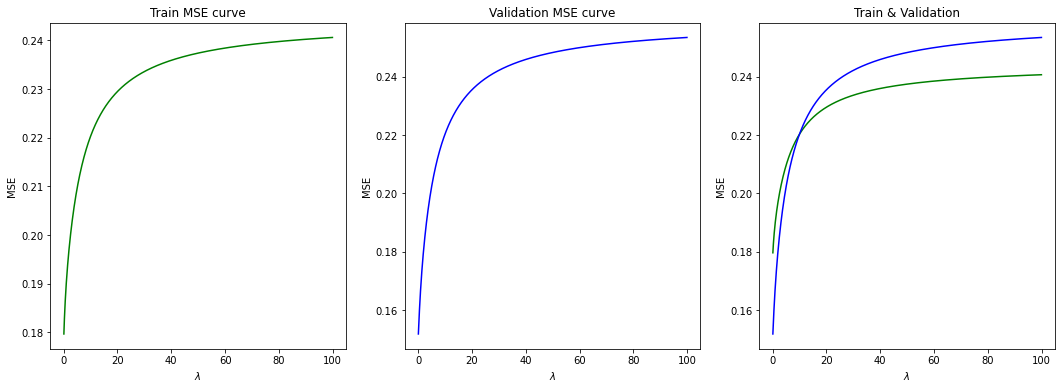

In [ ]:
# Plot results
fig, ax1 = plt.subplots(1,3,figsize=(18,6))

ax1[0].plot(lambdas, mse_train, 'g-')
ax1[0].set_title('Train MSE curve')

ax1[1].plot(lambdas, mse_vali, 'b-')
ax1[1].set_title('Validation MSE curve')

#Place the two plots into one
ax1[2].plot(lambdas, mse_train, 'g-')
ax1[2].plot(lambdas, mse_vali, 'b-')
ax1[2].set_title('Train & Validation')


for ax in ax1.flat:
    ax.set_xlabel('$\lambda$')
    ax.set_ylabel('MSE')
    
    
plt.show()

In [ ]:
min_index=mse_vali.index(min(mse_vali))
print("The optimal lambda is: ", lambdas[min_index])
print("Validation MSE=",mse_vali[min_index])
print("Train MSE=", mse_train[min_index])

The optimal lambda is:  0.1
Validation MSE= 0.15183918882953626
Train MSE= 0.17964097157270248


In [ ]:
print(results_l2.coef_)
print(results_l2.intercept_)

[-0.84040124 -1.48029506 -1.01242584]
2.334181787551302


In [ ]:
results_l2.set_params()

Ridge(alpha=2)

In [ ]:
Y_pred = modelo.predict(X_test)
Y_pred_0 = modelo.predict(X_train)

#Y_pred_ridge = model_l2.predict(X_train.drop(columns="Intercept"))
#Y_pred_0_ridge = results_l2.predict(X_test.drop(columns="Intercept"))

In [ ]:
Y_pred_0_ridge[0][1]

0.6028960439727713

In [ ]:
roc_train_ridge

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02564103, 0.02564103, 0.07692308, 0.07692308, 0.1025641 ,
        0.1025641 , 0.20512821, 0.20512821, 0.33333333, 0.33333333,
        0.38461538, 0.38461538, 0.46153846, 0.46153846, 0.56410256,
        0.56410256, 0.69230769, 0.69230769, 0.71794872, 0.71794872,
        0.74358974, 0.74358974, 0.79487179, 0.79487179, 1.        ]),
 array([0.        , 0.01886792, 0.09433962, 0.13207547, 0.39622642,
        0.39622642, 0.45283019, 0.45283019, 0.50943396, 0.50943396,
        0.58490566, 0.58490566, 0.60377358, 0.60377358, 0.62264151,
        0.62264151, 0.75471698, 0.75471698, 0.79245283, 0.79245283,
        0.83018868, 0.83018868, 0.86792453, 0.86792453, 0.96226415,
        0.96226415, 0.98113208, 0.98113208, 1.        , 1.        ]),
 array([1.78142137, 0.78142137, 0.74684368, 0.74399584, 0.6714857 ,
        0.66713764, 0.65707196, 0.65167484, 0.62681665, 0.62595582,
        0.60837229, 0.60127446, 0.59818061, 

In [ ]:
roc_p = roc_curve(y_test, Y_pred)
roc_train=roc_curve(y_train, Y_pred_0)

#roc_p_ridge = roc_curve(y_test, Y_pred_0_ridge)
#roc_train_ridge=roc_curve(y_train, Y_pred_ridge)
roc_p_ridge = roc_curve(y_test, [x[1] for x in Y_pred_0_ridge])
roc_train_ridge=roc_curve(y_train, [x[1] for x in Y_pred_ridge])

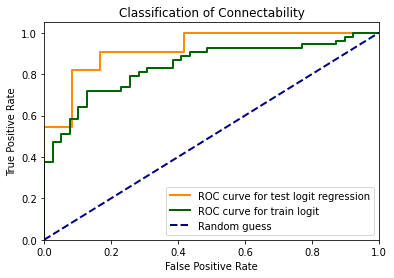

In [ ]:
plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'ROC curve for test logit regression')
plt.plot(roc_train[0], roc_train[1], color='darkgreen',
         lw=line_width, label=f'ROC curve for train logit')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Connectability')
plt.legend(loc='lower right')
plt.show()

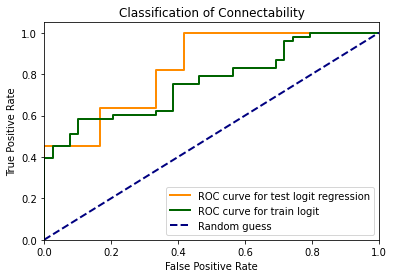

In [ ]:
plt.figure()
line_width = 2
plt.plot(roc_p_ridge[0], roc_p_ridge[1], color='darkorange',
         lw=line_width, label=f'ROC curve for test logit regression')
plt.plot(roc_train_ridge[0], roc_train_ridge[1], color='darkgreen',
         lw=line_width, label=f'ROC curve for train logit')
plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Connectability')
plt.legend(loc='lower right')
plt.show()

In [ ]:
auc_p = auc( roc_p[0], roc_p[1] )
print(auc_p)
auc_p = auc( roc_train[0], roc_train[1] )
print(auc_p)

0.9242424242424241
0.8393807450411223


In [ ]:
auc_p = auc( roc_p_ridge[0], roc_p_ridge[1] )
print(auc_p)
auc_p = auc( roc_train_ridge[0], roc_train_ridge[1] )
print(auc_p)

0.8333333333333333
0.7639090469279147
